# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest

clientes = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

clientes.to_csv('../data/raw/Clientes_Banco_Portugues.csv')

clientes.shape

(41188, 21)

In [2]:
clientes.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No existen datos nulos en nuestro dataset, pasamos a ver si hay valores duplicados y si podemos eliminar esas variables.

In [4]:
print(clientes['contact'].value_counts(), "\n")

print(clientes['default'].value_counts(), "\n")

print(clientes['housing'].value_counts(), "\n")

print(clientes['day_of_week'].value_counts())


contact
cellular     26144
telephone    15044
Name: count, dtype: int64 

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


In [5]:
print(clientes['pdays'].value_counts())


pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64


In [6]:
print(clientes['previous'].value_counts(), "\n")

print(clientes['poutcome'].value_counts(), "\n")

print(clientes['emp.var.rate'].value_counts())



previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64 

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64 

emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64


In [7]:
print(clientes['cons.price.idx'].value_counts())


cons.price.idx
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64


In [8]:
print(clientes['nr.employed'].value_counts(), "\n")

print(clientes['y'].value_counts(), "\n")

print(clientes['euribor3m'].value_counts())


nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64 

y
no     36548
yes     4640
Name: count, dtype: int64 

euribor3m
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.669       1
3.282       1
3.053       1
3.816       1
1.574       1
Name: count, Length: 316, dtype: int64


Tras observar los resultados anteriores, vemos que aunque no hay datos nulos las variables 'default' y 'housing' tiene valores unknown. En el caso de 'housing' cambiaremos esos datos unknown por valores NaN para eliminar esas filas del dataset. La columna 'default' la eliminaremos ya que el valor 'No' representa casi el 80% de la muestra y el valor 'unknown' casi el 20% restante.

La columna 'contact' podemos elimninarla de nuestro dataset. Sus valores no cambiarían nada en nuestro estudio.

Además las columnas 'pdays' y 'poutcome' podemos eliminarlas ya que el valor '999' y 'nonexistent', respectivamente, constituyen alrededor del 90% de sus columnas y no tendría efecto en nuestro estudio.

Al igual, que las columnas, 'cons.price.idx' y 'nr.employed', también podemos eliminarlas. En este caso, se debe a que la diferencia entre su valor máximo y mínimo es muy pequeña.

In [9]:
clientes_dropped = clientes.drop(['default', 'contact', 'pdays', 'poutcome', 'cons.price.idx', 'nr.employed'], axis = 1)

clientes_dropped.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,may,mon,261,1,0,1.1,-36.4,4.857,no
1,57,services,married,high.school,no,no,may,mon,149,1,0,1.1,-36.4,4.857,no
2,37,services,married,high.school,yes,no,may,mon,226,1,0,1.1,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,may,mon,151,1,0,1.1,-36.4,4.857,no
4,56,services,married,high.school,no,yes,may,mon,307,1,0,1.1,-36.4,4.857,no


In [10]:

clientes_dropped['housing'] = clientes_dropped['housing'].replace('unknown', np.nan)

clientes_final = clientes_dropped.dropna(subset=['housing'])

clientes_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            40198 non-null  int64  
 1   job            40198 non-null  object 
 2   marital        40198 non-null  object 
 3   education      40198 non-null  object 
 4   housing        40198 non-null  object 
 5   loan           40198 non-null  object 
 6   month          40198 non-null  object 
 7   day_of_week    40198 non-null  object 
 8   duration       40198 non-null  int64  
 9   campaign       40198 non-null  int64  
 10  previous       40198 non-null  int64  
 11  emp.var.rate   40198 non-null  float64
 12  cons.conf.idx  40198 non-null  float64
 13  euribor3m      40198 non-null  float64
 14  y              40198 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 4.9+ MB


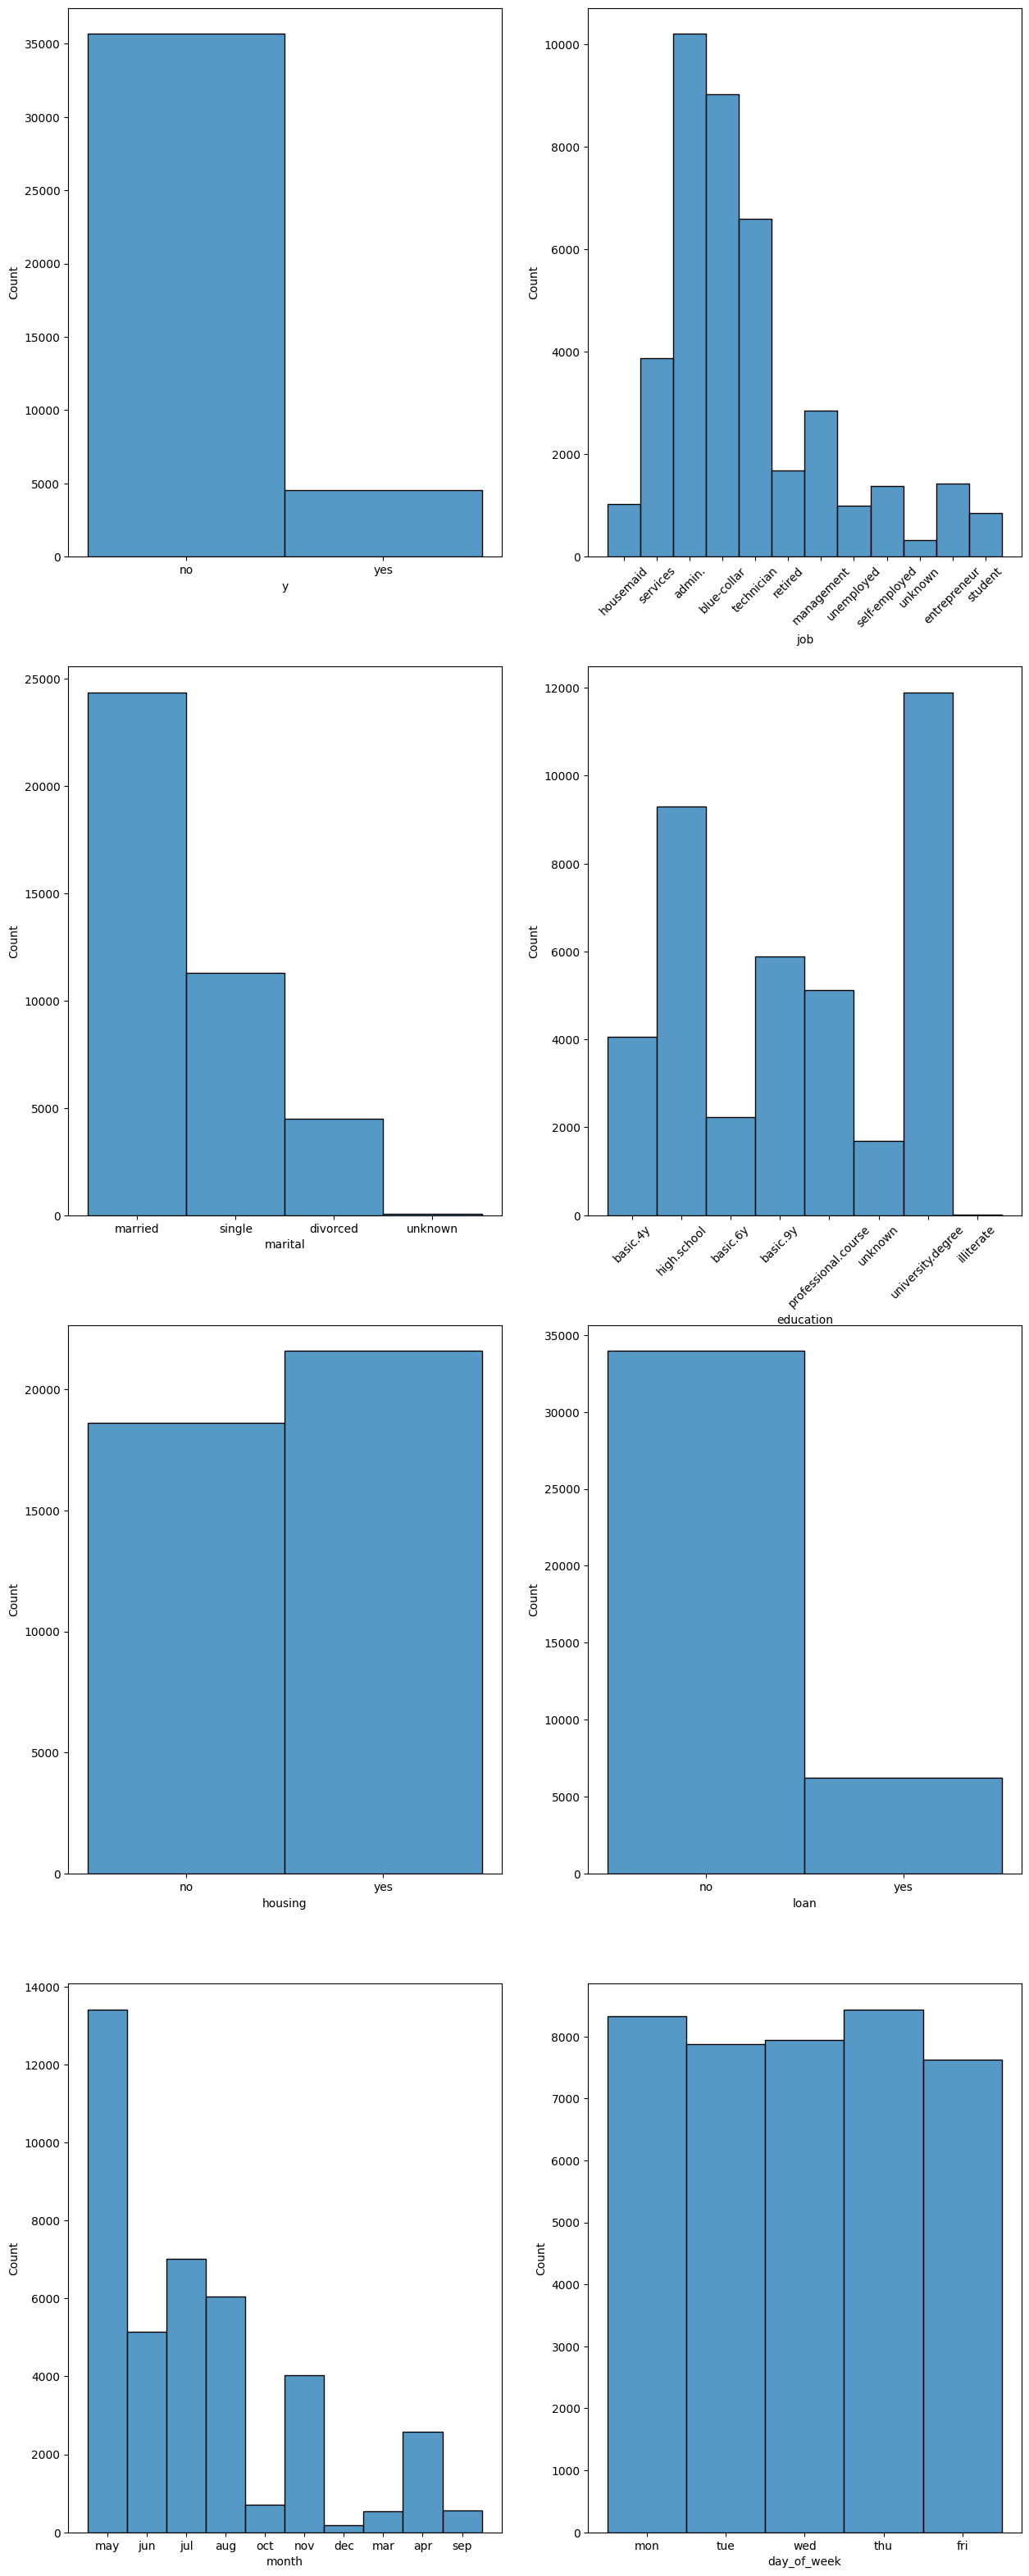

In [11]:
fig, axis = plt.subplots(4, 2, figsize=(15, 40))

sns.histplot(ax = axis[0,0], data = clientes_final, x = "y")
sns.histplot(ax = axis[0,1], data = clientes_final, x = "job")
sns.histplot(ax = axis[1,0], data = clientes_final, x = "marital")
sns.histplot(ax = axis[1,1], data = clientes_final, x = "education")
sns.histplot(ax = axis[2,0], data = clientes_final, x = "housing")
sns.histplot(ax = axis[2,1], data = clientes_final, x = "loan")
sns.histplot(ax = axis[3,0], data = clientes_final, x = "month")
sns.histplot(ax = axis[3,1], data = clientes_final, x = "day_of_week")


axis[0, 1].tick_params(axis='x', rotation=45)
axis[1, 1].tick_params(axis='x', rotation=45)



Observando las gráficas vemos lo siguiente:

- La mayoría de los clientes no tiene un préstamo a largo plazo contratado.

- La mayoría de los clientes son admin, blue-collar o technician, mientras que hay una menor parte de housemaid, unemployed y student.

- Respecto al estado civil, aunque hay más solteros que divorciados, la mayoría están casados.

- En cuanto al nivel de estudios, la mayoría tienen estudios universitarios o la secundaria y una minoría tiene estudios básicos (4y y 6y)

- En el caso del préstamo de vivienda (housing) el resultado es muy parejo, hay prácticamente un 50% entre los clientes que si lo tienen contratado y los que no. Por lo que podemos eliminar esta columna de la muestra.

- Respecto al préstamo personal, un gran porcentaje no lo tiene contratado.

- La mayoría de los clientes se les ha contactado durante el mes de mayo, esto puede ser debido a que en este mes las campañas de markting son mas numerosas.

- En cuanto al día de la semana en el que se ha contactado al cliente, el porcentaje esta muy igualado entre todos los días. Por lo que también podemos eliminar esta variable.

In [12]:
clientes_final = clientes_final.drop(['housing', 'day_of_week'], axis = 1)

clientes_final.head()

,age,job,marital,education,loan,month,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,may,261,1,0,1.1,-36.4,4.857,no
1,57,services,married,high.school,no,may,149,1,0,1.1,-36.4,4.857,no
2,37,services,married,high.school,no,may,226,1,0,1.1,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,may,151,1,0,1.1,-36.4,4.857,no
4,56,services,married,high.school,yes,may,307,1,0,1.1,-36.4,4.857,no


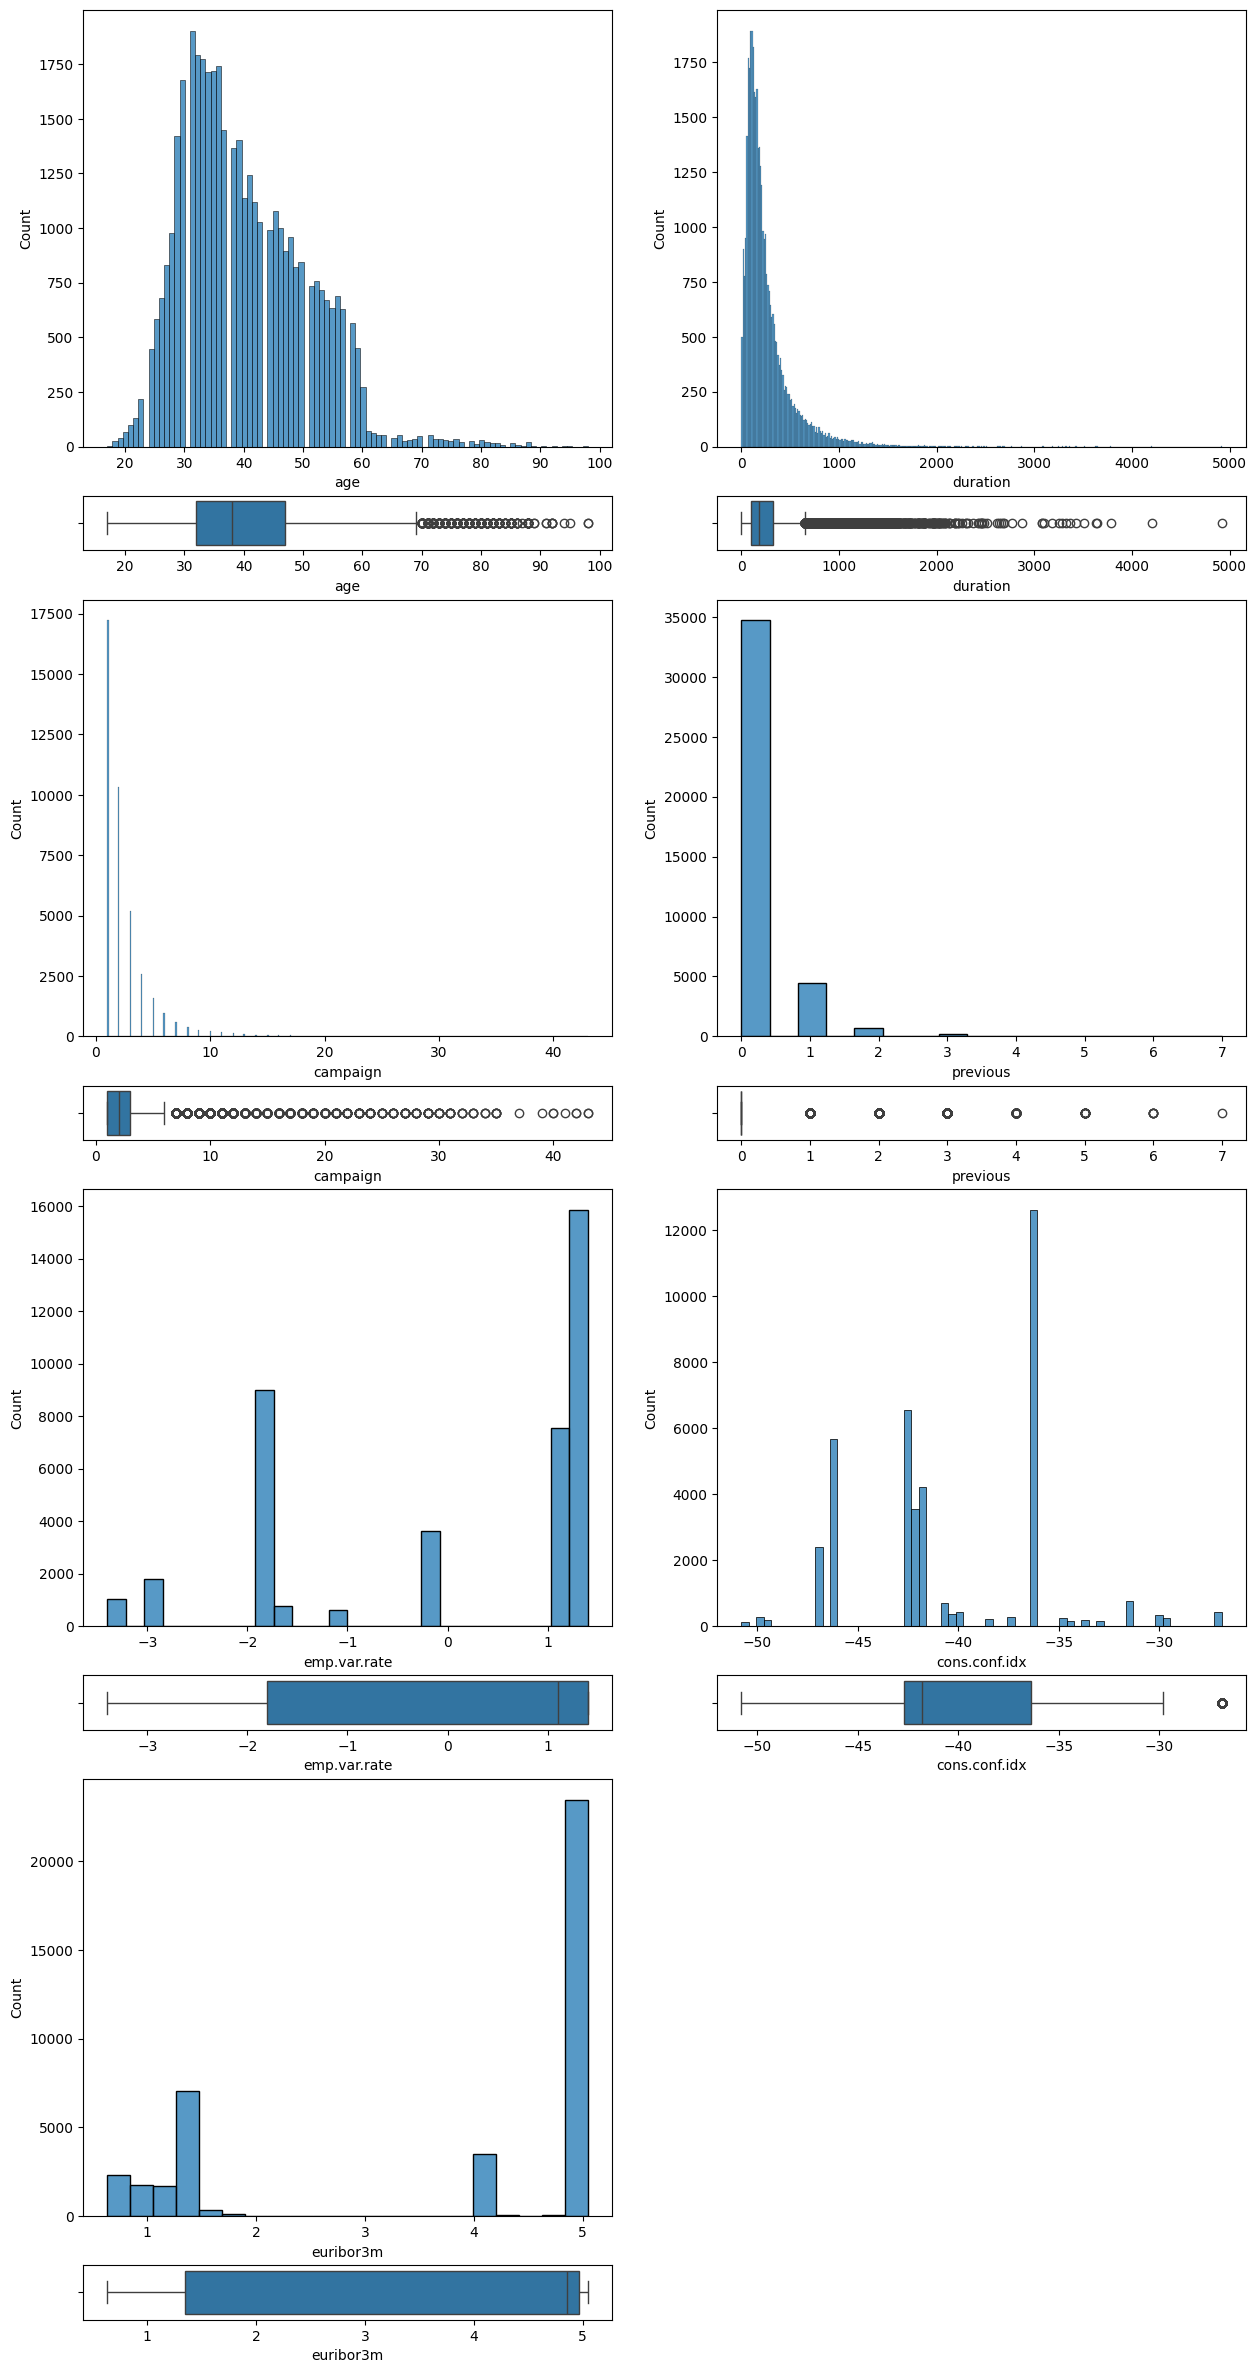

In [13]:
fig, axis = plt.subplots(8, 2, figsize = (15, 30), gridspec_kw = {"height_ratios": [8, 1, 8, 1, 8, 1, 8, 1]})

sns.histplot(ax = axis[0, 0], data = clientes_final, x = "age")
sns.boxplot(ax = axis[1, 0], data = clientes_final, x = "age")

sns.histplot(ax = axis[0, 1], data = clientes_final, x = "duration")
sns.boxplot(ax = axis[1, 1], data = clientes_final, x = "duration")

sns.histplot(ax = axis[2, 0], data = clientes_final, x = "campaign")
sns.boxplot(ax = axis[3, 0], data = clientes_final, x = "campaign")

sns.histplot(ax = axis[2, 1], data = clientes_final, x = "previous")
sns.boxplot(ax = axis[3, 1], data = clientes_final, x = "previous")

sns.histplot(ax = axis[4, 0], data = clientes_final, x = "emp.var.rate")
sns.boxplot(ax = axis[5, 0], data = clientes_final, x = "emp.var.rate")

sns.histplot(ax = axis[4, 1], data = clientes_final, x = "cons.conf.idx")
sns.boxplot(ax = axis[5, 1], data = clientes_final, x = "cons.conf.idx")

sns.histplot(ax = axis[6, 0], data = clientes_final, x = "euribor3m")
sns.boxplot(ax = axis[7, 0], data = clientes_final, x = "euribor3m")

fig.delaxes(axis[6, 1])
fig.delaxes(axis[7, 1])


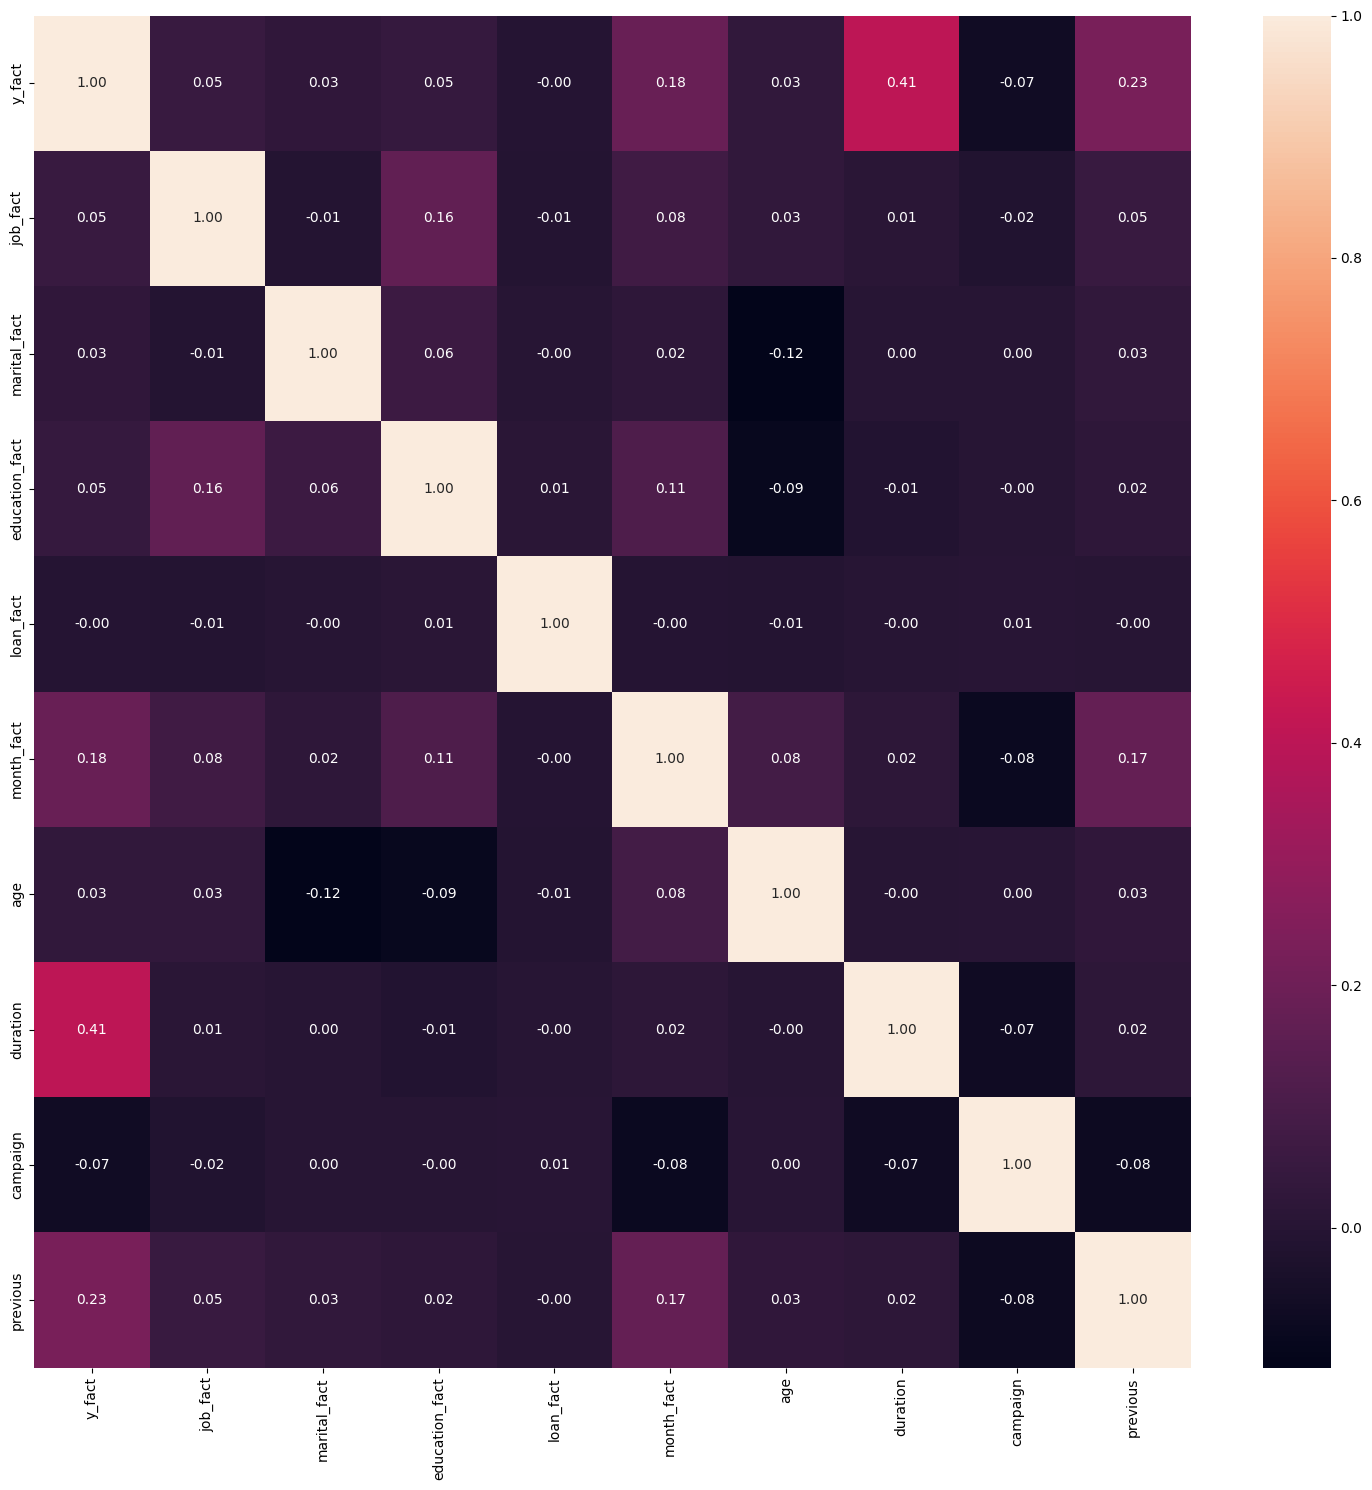

In [14]:
clientes_final["y_fact"] = pd.factorize(clientes_final["y"])[0]
clientes_final["job_fact"] = pd.factorize(clientes_final["job"])[0]
clientes_final["marital_fact"] = pd.factorize(clientes_final["marital"])[0]
clientes_final["education_fact"] = pd.factorize(clientes_final["education"])[0]
clientes_final["loan_fact"] = pd.factorize(clientes_final["loan"])[0]
clientes_final["month_fact"] = pd.factorize(clientes_final["month"])[0]


fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(clientes_final[['y_fact', 'job_fact', 'marital_fact', 'education_fact', 'loan_fact', 'month_fact', 'age', 'duration', 'campaign', 'previous']].corr(), annot = True, fmt = '.2f')

plt.tight_layout()

plt.show()

Con los resultado de la gráfica vemos que la contratación de un préstamos a largo plazo por parte de los clientes tiene algo de relacion con la duración de las llamadas y con el número de contactos realizados la campaña anterior.

In [15]:
clientes_final.head()

,age,job,marital,education,loan,month,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,y,y_fact,job_fact,marital_fact,education_fact,loan_fact,month_fact
0,56,housemaid,married,basic.4y,no,may,261,1,0,1.1,-36.4,4.857,no,0,0,0,0,0,0
1,57,services,married,high.school,no,may,149,1,0,1.1,-36.4,4.857,no,0,1,0,1,0,0
2,37,services,married,high.school,no,may,226,1,0,1.1,-36.4,4.857,no,0,1,0,1,0,0
3,40,admin.,married,basic.6y,no,may,151,1,0,1.1,-36.4,4.857,no,0,2,0,2,0,0
4,56,services,married,high.school,yes,may,307,1,0,1.1,-36.4,4.857,no,0,1,0,1,1,0


In [16]:
clientes_fact = clientes_final.drop(['job', 'marital', 'education', 'loan', 'month', 'y'], axis = 1)

clientes_fact.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,y_fact,job_fact,marital_fact,education_fact,loan_fact,month_fact
0,56,261,1,0,1.1,-36.4,4.857,0,0,0,0,0,0
1,57,149,1,0,1.1,-36.4,4.857,0,1,0,1,0,0
2,37,226,1,0,1.1,-36.4,4.857,0,1,0,1,0,0
3,40,151,1,0,1.1,-36.4,4.857,0,2,0,2,0,0
4,56,307,1,0,1.1,-36.4,4.857,0,1,0,1,1,0


In [17]:
clientes_fact.describe()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,y_fact,job_fact,marital_fact,education_fact,loan_fact,month_fact
count,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000,40198.000000
mean,40.025847,258.484253,2.567765,0.172670,0.081109,-40.507856,3.620509,0.112767,3.672720,0.510150,3.279765,0.155431,2.254590
std,10.422343,259.387105,2.765476,0.494075,1.570546,4.629656,1.734312,0.316311,2.452912,0.696523,2.185434,0.362319,2.429464
min,17.000000,0.000000,1.000000,0.000000,-3.400000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,-42.700000,1.344000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,-41.800000,4.857000,0.000000,3.000000,0.000000,3.000000,0.000000,2.000000
75%,47.000000,320.000000,3.000000,0.000000,1.400000,-36.400000,4.961000,0.000000,4.000000,1.000000,6.000000,0.000000,3.000000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,-26.900000,5.045000,1.000000,11.000000,3.000000,7.000000,1.000000,9.000000


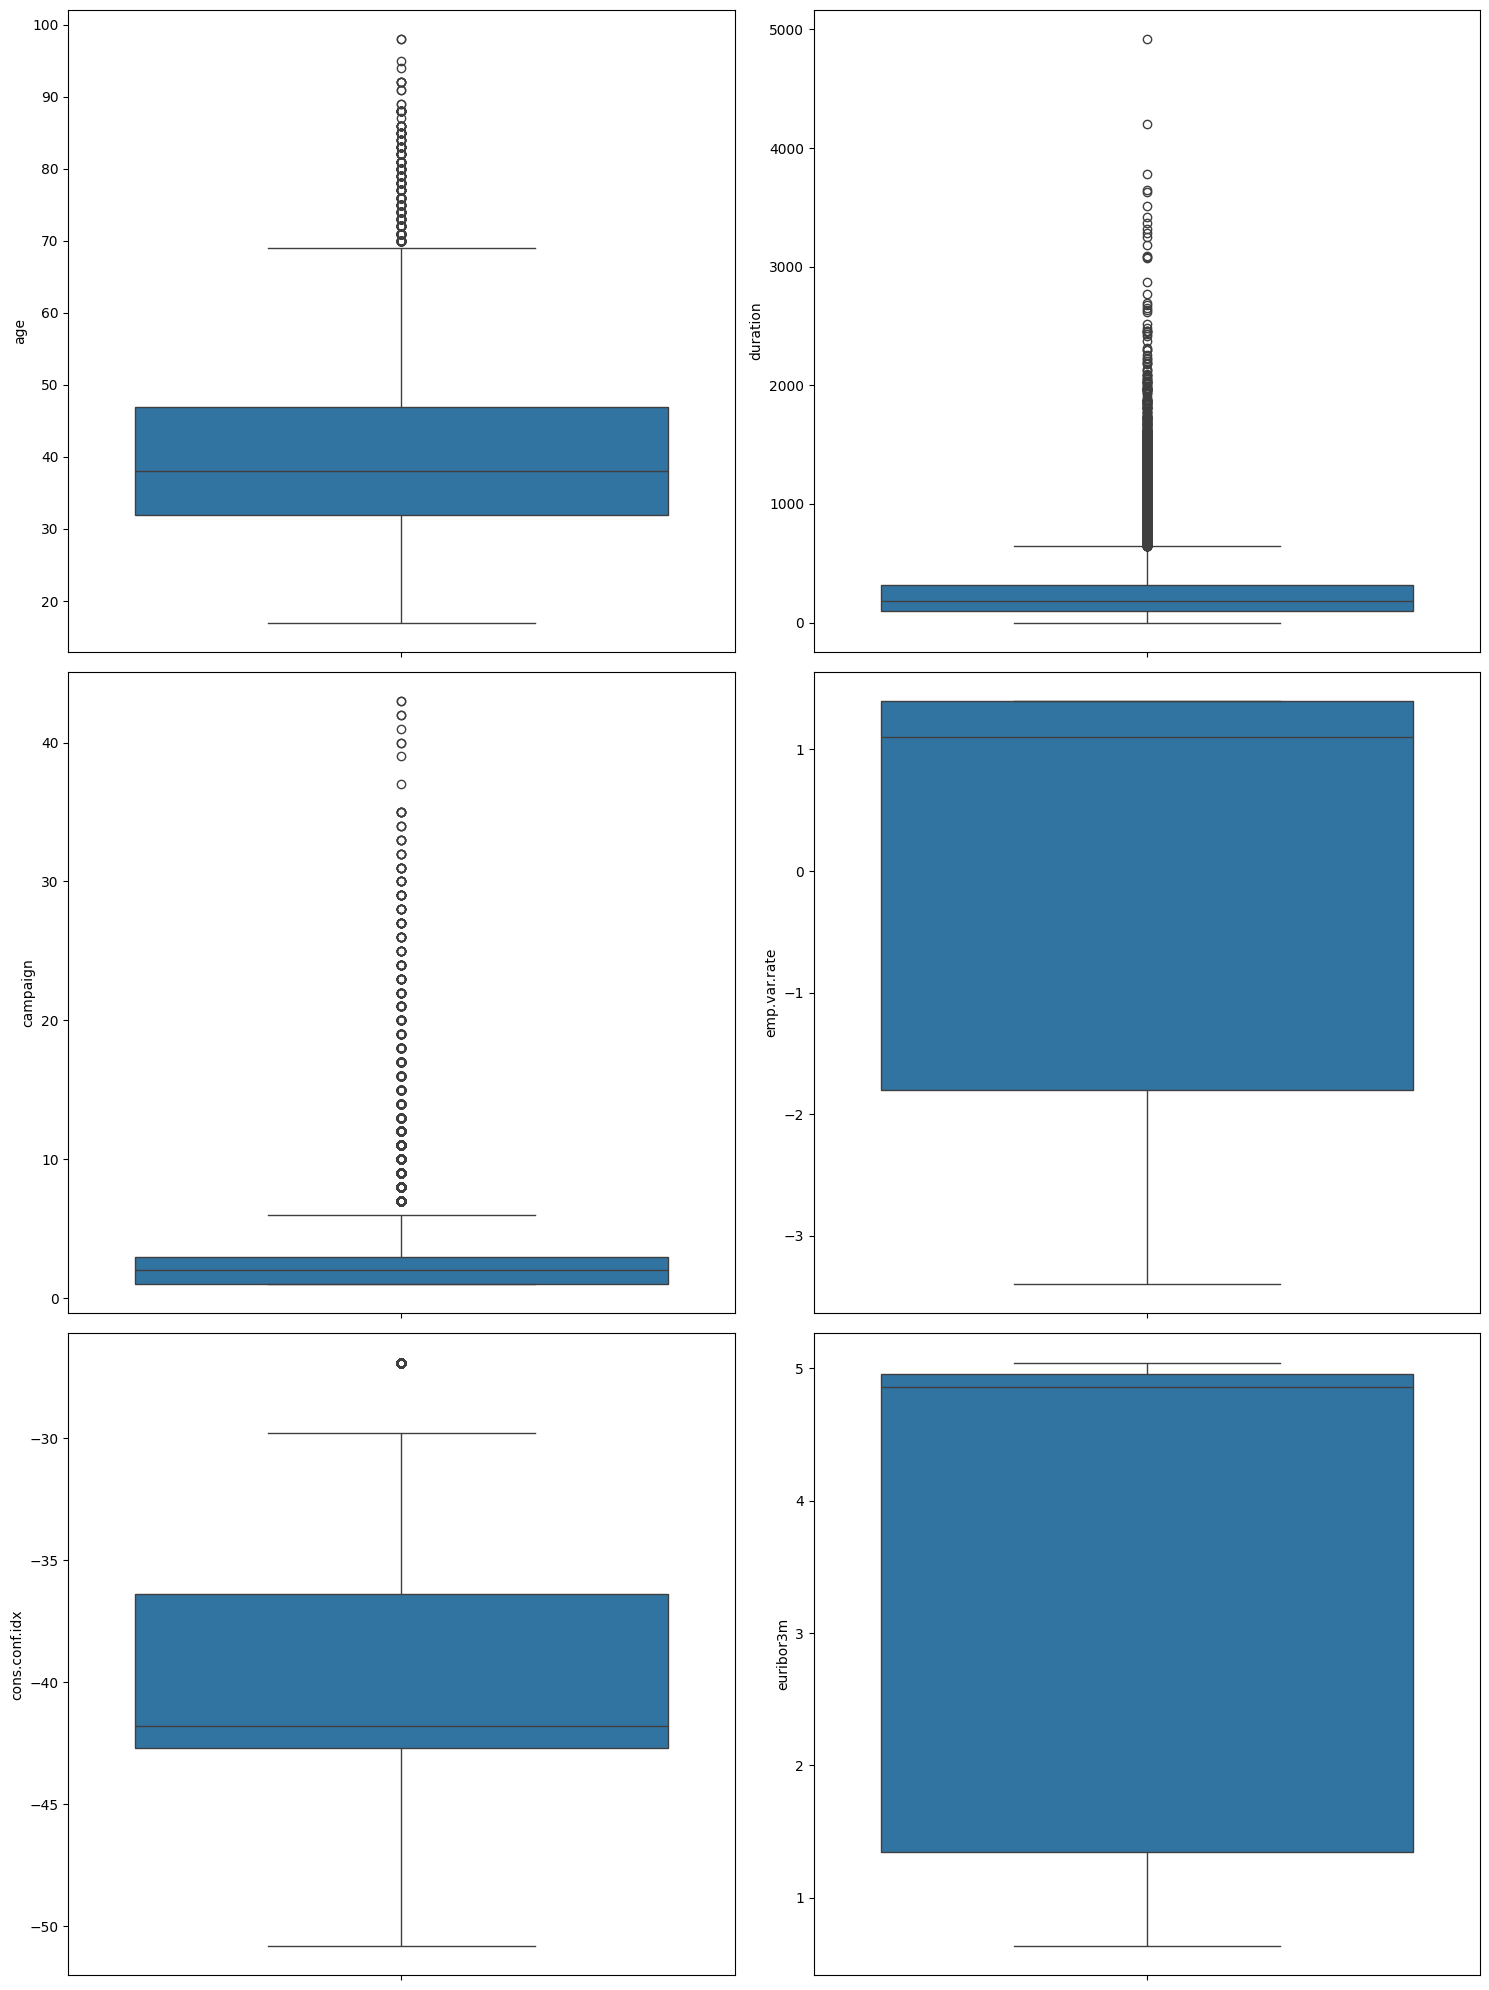

In [18]:
fig, axes = plt.subplots(3, 2, figsize = (15, 20))

sns.boxplot(ax = axes[0, 0], data = clientes_fact, y = "age")
sns.boxplot(ax = axes[0, 1], data = clientes_fact, y = "duration")
sns.boxplot(ax = axes[1, 0], data = clientes_fact, y = "campaign")
sns.boxplot(ax = axes[1, 1], data = clientes_fact, y = "emp.var.rate")
sns.boxplot(ax = axes[2, 0], data = clientes_fact, y = "cons.conf.idx")
sns.boxplot(ax = axes[2, 1], data = clientes_fact, y = "euribor3m")



plt.tight_layout()

plt.show()



Muchas de las variables tienen valores outliers, pero no podemos eliminarlos ya que pueden ser perfectamente correctos.

In [19]:
clientes_fact.isnull().sum().sort_values(ascending=False)

age               0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.conf.idx     0
euribor3m         0
y_fact            0
job_fact          0
marital_fact      0
education_fact    0
loan_fact         0
month_fact        0
dtype: int64

No existen valores nulos en nuestro dataset

In [20]:
scaler = MinMaxScaler()

variables = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'job_fact', 'marital_fact', 'education_fact', 'loan_fact', 'month_fact']
scaled_variables = scaler.fit_transform(clientes_fact[variables])

clientes_scaled = pd.DataFrame(scaled_variables, index = clientes_fact.index, columns = variables)

clientes_scaled['y_fact'] = clientes_fact['y_fact']

clientes_scaled.head()



,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,job_fact,marital_fact,education_fact,loan_fact,month_fact,y_fact
0,0.481481,0.053070,0.0,0.0,0.9375,0.60251,0.957379,0.000000,0.0,0.000000,0.0,0.0,0
1,0.493827,0.030297,0.0,0.0,0.9375,0.60251,0.957379,0.090909,0.0,0.142857,0.0,0.0,0
2,0.246914,0.045954,0.0,0.0,0.9375,0.60251,0.957379,0.090909,0.0,0.142857,0.0,0.0,0
3,0.283951,0.030704,0.0,0.0,0.9375,0.60251,0.957379,0.181818,0.0,0.285714,0.0,0.0,0
4,0.481481,0.062424,0.0,0.0,0.9375,0.60251,0.957379,0.090909,0.0,0.142857,1.0,0.0,0


In [21]:
X = clientes_scaled.drop('y_fact', axis = 1)
y = clientes_scaled['y_fact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

modelo = SelectKBest(score_func = f_classif, k = 8)

modelo.fit(X_train, y_train)

ix = modelo.get_support()

X_train_sel = pd.DataFrame(modelo.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo.transform(X_test), columns = X_test.columns.values[ix])


X_train_sel.head()

,duration,campaign,previous,emp.var.rate,cons.conf.idx,euribor3m,job_fact,month_fact
0,0.010573,0.047619,0.000000,1.000000,0.615063,0.982090,0.363636,0.333333
1,0.057544,0.023810,0.000000,0.937500,0.602510,0.957153,0.272727,0.000000
2,0.043717,0.000000,0.000000,0.937500,0.602510,0.957379,0.181818,0.000000
3,0.022163,0.095238,0.142857,0.333333,0.677824,0.002494,0.181818,0.888889
4,0.024603,0.023810,0.000000,1.000000,0.338912,0.980957,0.363636,0.222222


Tras aplicar el modelo SelectKBest, obtenemos que las 8 mejores variables son duration, campaign, previous, emp.var.rate, cons.conf.idx, euribor3m, job_fact, month_fact.

In [22]:

#Agregamos las etiquetas de entrenamiento (y_train) y prueba (y_test) como una nueva columna en los dataframes X_train_sel y X_test_sel, respectivamente
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

#Guardamos los dataframes en formato .csv para usarlos posteriormente en el modelo de machine learning
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)



In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")



In [24]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [32]:
from sklearn.linear_model import LogisticRegression

modelo_ml = LogisticRegression()
modelo_ml.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = modelo_ml.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [34]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9013681592039801

Nuestro modelo predice con un 90% de efectividad

Vamos a modificar los hiperparámetros para ver si podemos mejorar esa precisión

In [35]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [36]:
from sklearn.model_selection import GridSearchCV

hiperparametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(modelo_ml, hiperparametros, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [38]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [39]:
modelo_opt = LogisticRegression(C = 10, penalty = 'l2', solver = 'newton-cg')
modelo_opt.fit(X_train, y_train)

LogisticRegression(C=10, solver='newton-cg')

In [40]:
y_opt = modelo_opt.predict(X_test)
y_opt

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
accuracy_score(y_test, y_pred)

0.9013681592039801

Tras optimizar el modelo de Machine Learning vemos que la precisión no ha cambiado, por lo que para mejorar el modelo tendriamos que probar con otros hiperparámetros, ya que testeando solo con los hiperparámetros de penalty, C y solver no podemos mejorar el modelo.